Forecasting

In [1]:
library(changepoint)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [2]:
susceptibilities=c(60, 96, 95, 94, 95, 60, 97, 83, 79, 80, 78, 71, 81, 80, 80, 60, 61, 60, 83, 82, 82, 78)

In [3]:
n=length(susceptibilities)
n

[1] 22

In [4]:
change_points = cpt.mean(susceptibilities, method = "PELT", penalty = "Asymptotic",
	pen.value = 0.05, class = TRUE, param.estimates = TRUE, test.stat = "Normal")

Warning message in penalty_decision(penalty, pen.value, n, diffparam, asymcheck = costfunc, :
“Asymptotic penalty value is not accurate for multiple changes, it should be treated the same as a manual penalty choice.”

In [5]:
change_points

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Fri Sep 28 07:29:21 2018 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : PELT 
Test Statistic  : Normal 
Type of penalty       : Asymptotic with value, 19.02692 
Minimum Segment Length : 1 
Maximum no. of cpts   : Inf 
Changepoint Locations : 1 5 6 7 11 12 15 18 

Seems really excessive

.

.

**From the documentation ... A changepoint is denoted as the first observation of the new segment / regime.**

This seems odd, given this example of clearly broken data.

R is a 1-based index (not 0). The changepoint locations returned seem to be more likely the LAST point in the CURRENT segment.

.

.

.




In [6]:
number_of_change_points = length(cpts(change_points))
number_of_change_points

[1] 8

In [7]:
cpts(change_points)

[1]  1  5  6  7 11 12 15 18

In [8]:
indices = cpts(change_points)
print(indices)

[1]  1  5  6  7 11 12 15 18


In [9]:
for(i in 0:length(indices)){
    if(i == 0){
        print(paste0("First segment : ", toString(susceptibilities[1:indices[i+1]])))
    } else if ( i == length(indices) ){
        print(paste0("Last segment : ", toString(susceptibilities[(indices[i]+1):length(susceptibilities)])))
    } else {
        print(paste0("Mid segment : ", toString(susceptibilities[(indices[i]+1):indices[i+1]])))

    }
}

[1] "First segment : 60"
[1] "Mid segment : 96, 95, 94, 95"
[1] "Mid segment : 60"
[1] "Mid segment : 97"
[1] "Mid segment : 83, 79, 80, 78"
[1] "Mid segment : 71"
[1] "Mid segment : 81, 80, 80"
[1] "Mid segment : 60, 61, 60"
[1] "Last segment : 83, 82, 82, 78"


In [10]:
class(cpts(change_points))

[1] "integer"

In [11]:
last_change_point = cpts(change_points)[number_of_change_points]
last_change_point

[1] 18

These susceptiblities correspond to the following years.

In [12]:
Year = 1988:2009
Year

[1] 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
[16] 2003 2004 2005 2006 2007 2008 2009

In [13]:
length(Year)

[1] 22

In [14]:
susceptibilities[(last_change_point+1):n]

[1] 83 82 82 78

In [15]:
Year[(last_change_point+1):n]

[1] 2006 2007 2008 2009

In [16]:
model<-lm((susceptibilities[(last_change_point+1):n])~(Year[(last_change_point+1):n]))
model


Call:
lm(formula = (susceptibilities[(last_change_point + 1):n]) ~ 
    (Year[(last_change_point + 1):n]))

Coefficients:
                    (Intercept)  Year[(last_change_point + 1):n]  
                         3092.5                             -1.5  


In [17]:
prediction<-(model$coefficients[1])+(2020*(model$coefficients[2]))
prediction

(Intercept) 
       62.5

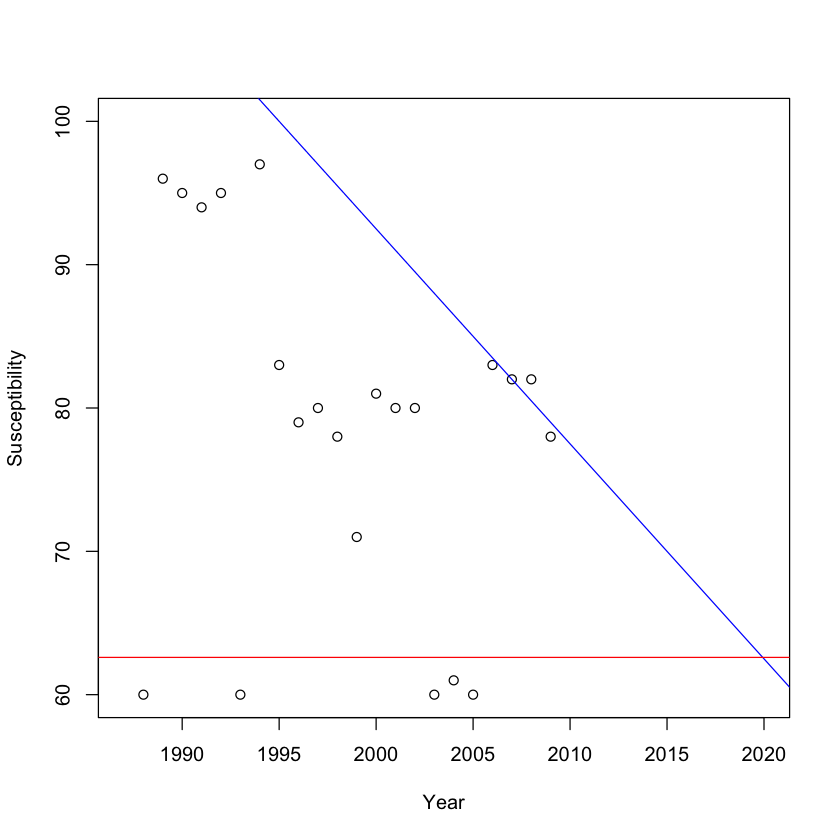

In [18]:
plot(Year,susceptibilities,
    ylim=c(60,100),xlim=c(1987,2020),xlab="Year",ylab="Susceptibility")
abline(model$coefficients,col='blue')
abline(h=62.6,col='red')